# FastSAM for Multiple Object Tracking

In [114]:
from ultralytics import SAM
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load a model
model = SAM("sam2.1_b.pt")
# Segment everything
bbox_results = model("C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00334.png", 
                     bboxes=[
                         [1278.4,       398.9,      1530.9,      608.72]] ##1288.7, 557, 1519, 750.16
                    ) #1278.4,       398.9,      1530.9,      608.72


image 1/1 C:\Users\dnnxl\Documents\GitHub\drone-sort\dataset\DJI_20240308110115_0005_V\valid\images\frame_00334.png: 1024x1024 1 0, 6444.1ms
Speed: 126.5ms preprocess, 6444.1ms inference, 0.0ms postprocess per image at shape (1, 3, 1024, 1024)


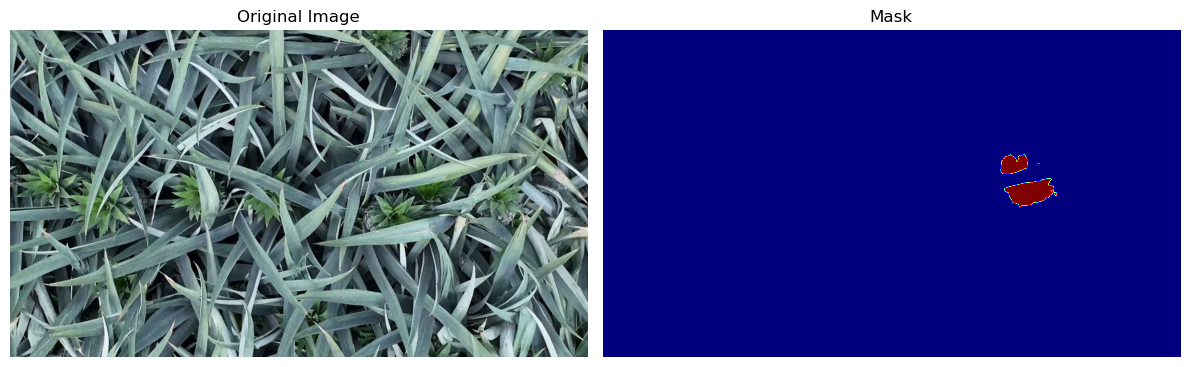

In [115]:
# Load the image
image_path = "C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00334.png"
image = Image.open(image_path)
image = np.array(image)

# Extract the mask
mask = bbox_results[0].masks.data.numpy()

# Normalize the mask (if necessary)
mask_normalized = mask / mask.max()

# Create a figure with two subplots
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot the original image on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Hide axes

# Plot the mask on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(mask_normalized[0], cmap='jet')  # Use the first channel of the mask
plt.title('Mask')
plt.axis('off')  # Hide axes

# Display the figure
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [122]:
import cv2
import numpy as np

# Function to compute IoU
def compute_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union if union != 0 else 0
    return iou

# Your existing code
bbox_results1 = model("C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00334.png", 
                     bboxes=[
                         [1278.4,       398.9,      1530.9,      608.72]] ##1288.7, 557, 1519, 750.16
                    )
mask1 = bbox_results1[0].masks.data.numpy()

bbox_results2 = model("C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00335.png", 
                     bboxes=[
                         [1288.7, 557, 1519, 750.16]] ##1288.7, 557, 1519, 750.16
                    )
mask2 = bbox_results2[0].masks.data.numpy()

# Crop masks
x1, y1, x2, y2 = map(int, [1278.4, 398.9, 1530.9, 608.72])
cropped_mask_1 = mask1[:, y1:y2, x1:x2]

x1, y1, x2, y2 = map(int, [1288.7, 557, 1519, 750.16])
cropped_mask_2 = mask2[:, y1:y2, x1:x2]

# Convert boolean masks to uint8 (0s and 1s)
cropped_mask_1 = cropped_mask_1.astype(np.uint8)
cropped_mask_2 = cropped_mask_2.astype(np.uint8)

# Resize masks to the same size
target_size = (200, 200)  # Use the size of the first mask
resized_mask_2 = cv2.resize(cropped_mask_2[0], target_size, interpolation=cv2.INTER_NEAREST)
resized_mask_2 = resized_mask_2[np.newaxis, :, :]  # Add batch dimension back

# Compute IoU
iou = compute_iou(cropped_mask_1, resized_mask_2)
print("IoU:", iou)

image 1/1 C:\Users\dnnxl\Documents\GitHub\drone-sort\dataset\DJI_20240308110115_0005_V\valid\images\frame_00334.png: 1024x1024 1 0, 13390.4ms
Speed: 65.0ms preprocess, 13390.4ms inference, 20.8ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 C:\Users\dnnxl\Documents\GitHub\drone-sort\dataset\DJI_20240308110115_0005_V\valid\images\frame_00335.png: 1024x1024 1 0, 11190.3ms
Speed: 35.1ms preprocess, 11190.3ms inference, 15.4ms postprocess per image at shape (1, 3, 1024, 1024)


ValueError: operands could not be broadcast together with shapes (1,210,252) (1,200,200) 

In [121]:
cropped_mask_1.shape[2]

252

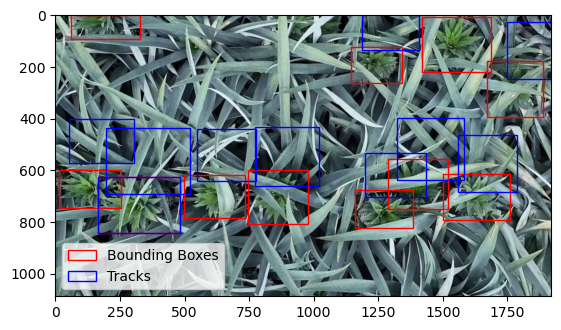

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the bounding boxes
bounding_boxes = [
    [1421.1, 7.7202, 1685.3, 220.28],
    [163.61, 624.68, 481.58, 842.4],
    [499.51, 618.71, 734.06, 782.65],
    [15.217, 596.98, 255.37, 746.1],
    [1145.3, 121.67, 1342.1, 262.05],
    [745.83, 598.71, 976.46, 807.44],
    [1500.5, 613.43, 1760.8, 791.44],
    [1159.6, 676.4, 1384.3, 822.95],
    [1669.9, 177.3, 1888.9, 391.73],
    [1288.7, 557, 1519, 750.16],
    [61.481, 0, 327.97, 90.72]
]

tracks = [
    #[1579, 964.74, 1814.8, 1201.8],
    #[1417.6, 1037.4, 1528.7, 1111.2],
    #[890.23, 905.22, 1118.1, 1116.7],
    #[383.47, 941.87, 421.88, 1426.5],
    [1198.3, 531.13, 1435.2, 702.31],
    [1560.3, 464.85, 1785.1, 684.02], # 1559.5      474.16      1784.4      693.33
    [197.02, 434.92, 520.74, 690.84],
    [774.69, 430.39, 1020.1, 660.59],
    [549.6, 439.31, 778.23, 640.52],
    [53.311, 400.54, 303.12, 572.61],
    [1322.6, 396.49, 1582.7, 639.04],
    #[35.476, 340.42, 92.972, 520.33],
    [1747, 27.165, 1954.3, 248.34],
    [1188.2, -7.5234, 1409, 134.49],
    #[364.5, 796.21, 459.36, 914.82],
    #[0.062759, 546.21, 60.611, 681.81],
    #[801.07, 0, 1122.3, 108.66],
    #[258.38, 893.62, 444.92, 1070.9],
    #[1421.1, 7.7202, 1685.3, 220.28],
    [163.61, 624.68, 481.58, 842.4],
    #[499.51, 618.71, 734.06, 782.65],
    #[15.217, 596.98, 255.37, 746.1],
    #[1145.3, 121.67, 1342.1, 262.05],
    #[745.83, 598.71, 976.46, 807.44],
    #[1500.5, 613.43, 1760.8, 791.44],
    #[1159.6, 676.4, 1384.3, 822.95],
    #[1669.9, 177.3, 1888.9, 391.73],
    #[1288.7, 557, 1519, 750.16],
    #[61.481, 0, 327.97, 90.72]
]

# Create a blank white image
image = cv2.imread("C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00335.png")  # Load your image here
if image is None:
    image = 255 * np.ones((1200, 1920, 3), dtype=np.uint8)  # Fallback to a blank white image

# Create a figure and axis
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib

# Plot bounding boxes in red
for box in bounding_boxes:
    x_min, y_min, x_max, y_max = box
    width = x_max - x_min
    height = y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none', label='Bounding Boxes')
    ax.add_patch(rect)

# Plot tracks in blue
for track in tracks:
    x_min, y_min, x_max, y_max = track
    width = x_max - x_min
    height = y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='b', facecolor='none', label='Tracks')
    ax.add_patch(rect)

# Remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates
ax.legend(by_label.values(), by_label.keys())

# Display the image with bounding boxes and tracks
plt.show()

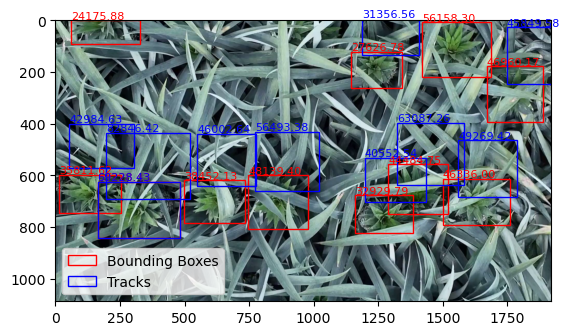

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the bounding boxes
bounding_boxes = [
    [1421.1, 7.7202, 1685.3, 220.28],
    [163.61, 624.68, 481.58, 842.4],
    [499.51, 618.71, 734.06, 782.65],
    [15.217, 596.98, 255.37, 746.1],
    [1145.3, 121.67, 1342.1, 262.05],
    [745.83, 598.71, 976.46, 807.44],
    [1500.5, 613.43, 1760.8, 791.44],
    [1159.6, 676.4, 1384.3, 822.95],
    [1669.9, 177.3, 1888.9, 391.73],
    [1288.7, 557, 1519, 750.16],
    [61.481, 0, 327.97, 90.72]
]

tracks = [
    [1198.3, 531.13, 1435.2, 702.31],
    [1560.3, 464.85, 1785.1, 684.02],
    [197.02, 434.92, 520.74, 690.84],
    [774.69, 430.39, 1020.1, 660.59],
    [549.6, 439.31, 778.23, 640.52],
    [53.311, 400.54, 303.12, 572.61],
    [1322.6, 396.49, 1582.7, 639.04],
    [1747, 27.165, 1954.3, 248.34],
    [1188.2, -7.5234, 1409, 134.49],
    [163.61, 624.68, 481.58, 842.4]
]

# Create a blank white image
image = cv2.imread("C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00335.png")  # Load your image here
if image is None:
    image = 255 * np.ones((1200, 1920, 3), dtype=np.uint8)  # Fallback to a blank white image

# Create a figure and axis
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib

# Plot bounding boxes in red
for box in bounding_boxes:
    x_min, y_min, x_max, y_max = box
    width = x_max - x_min
    height = y_max - y_min
    area = width * height
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none', label='Bounding Boxes')
    ax.add_patch(rect)
    # Add text for the area
    ax.text(x_min, y_min - 5, f'{area:.2f}', color='r', fontsize=8)#, backgroundcolor='white')

# Plot tracks in blue
for track in tracks:
    x_min, y_min, x_max, y_max = track
    width = x_max - x_min
    height = y_max - y_min
    area = width * height
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='b', facecolor='none', label='Tracks')
    ax.add_patch(rect)
    # Add text for the area
    ax.text(x_min, y_min - 5, f'{area:.2f}', color='b', fontsize=8)#, backgroundcolor='white')

# Remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates
ax.legend(by_label.values(), by_label.keys())

# Display the image with bounding boxes and tracks
plt.show()

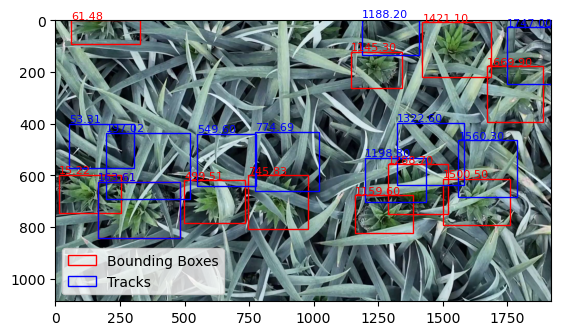

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the bounding boxes
bounding_boxes = [
    [1421.1, 7.7202, 1685.3, 220.28],
    [163.61, 624.68, 481.58, 842.4],
    [499.51, 618.71, 734.06, 782.65],
    [15.217, 596.98, 255.37, 746.1],
    [1145.3, 121.67, 1342.1, 262.05],
    [745.83, 598.71, 976.46, 807.44],
    [1500.5, 613.43, 1760.8, 791.44],
    [1159.6, 676.4, 1384.3, 822.95],
    [1669.9, 177.3, 1888.9, 391.73],
    [1288.7, 557, 1519, 750.16],
    [61.481, 0, 327.97, 90.72]
]

tracks = [
    [1198.3, 531.13, 1435.2, 702.31],
    [1560.3, 464.85, 1785.1, 684.02],
    [197.02, 434.92, 520.74, 690.84],
    [774.69, 430.39, 1020.1, 660.59],
    [549.6, 439.31, 778.23, 640.52],
    [53.311, 400.54, 303.12, 572.61],
    [1322.6, 396.49, 1582.7, 639.04],
    [1747, 27.165, 1954.3, 248.34],
    [1188.2, -7.5234, 1409, 134.49],
    [163.61, 624.68, 481.58, 842.4]
]

# Create a blank white image
image = cv2.imread("C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00335.png")  # Load your image here
if image is None:
    image = 255 * np.ones((1200, 1920, 3), dtype=np.uint8)  # Fallback to a blank white image

# Create a figure and axis
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib

# Plot bounding boxes in red
for box in bounding_boxes:
    x_min, y_min, x_max, y_max = box
    width = x_max - x_min
    height = y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none', label='Bounding Boxes')
    ax.add_patch(rect)
    # Add text for width and height
    ax.text(x_min, y_min - 5, f'{x_min:.2f}', color='r', fontsize=8)

# Plot tracks in blue
for track in tracks:
    x_min, y_min, x_max, y_max = track
    width = x_max - x_min
    height = y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='b', facecolor='none', label='Tracks')
    ax.add_patch(rect)
    # Add text for width and height
#    ax.text(x_min, y_min - 5, f'W:{width:.2f}, H:{height:.2f}', color='b', fontsize=8)
    ax.text(x_min, y_min - 5, f'{x_min:.2f}', color='b', fontsize=8)

# Remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates
ax.legend(by_label.values(), by_label.keys())

# Display the image with bounding boxes and tracks
plt.show()

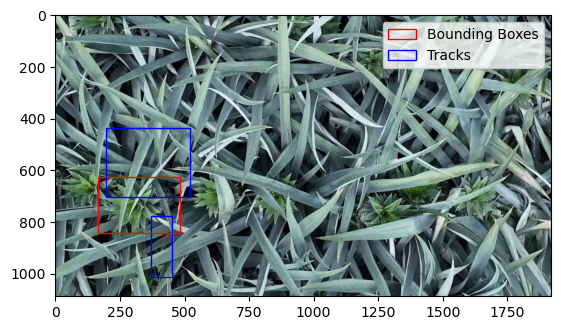

In [123]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the bounding boxes
bounding_boxes = np.array([
    #[1421.1, 7.7202, 1685.3, 220.28, ],
    #[163.61, 624.68, 481.58, 842.4, ],
    #[499.51, 618.71, 734.06, 782.65, ],
    #[15.217, 596.98, 255.37, 746.1, ],
    #[1145.3, 121.67, 1342.1, 262.05, ],
    #[745.83, 598.71, 976.46, 807.44, ],
    
    ##[1500.5, 613.43, 1760.8, 791.44, ],
    ##[1159.6, 676.4, 1384.3, 822.95, ],
    ##[1669.9, 177.3, 1888.9, 391.73, ],
    
    [163.61,      624.68,      481.58,       842.4],
    
    #[61.481, 0, 327.97, 90.72, ]
])
tracks = np.array([
    #[1184.1, 977.85, 1278.8, 1090.5],
    #[1579, 964.74, 1814.8, 1201.8],
    #[1417.6, 1037.4, 1528.7, 1111.2],
    #[890.23, 905.22, 1118.1, 1116.7],
    #[383.47, 941.87, 421.88, 1426.5],
    
    [369.47,      776.34,      452.08,      1013.5],
    
    ##[1560.3, 464.85, 1785.1, 684.02],
    
    #[197.02, 434.92, 520.74, 690.84],
    #[774.69, 430.39, 1020.1, 660.59],
    #[549.6, 439.31, 778.23, 640.52],
    #[53.311, 400.54, 303.12, 572.61],
    
    [ 195.53,      437.87,      520.25,      704.14 ],
    
    #[35.476, 340.42, 92.972, 520.33],
    #[1747, 27.165, 1954.3, 248.34],
    #[1188.2, -7.5234, 1409, 134.49],
    #[364.5, 796.21, 459.36, 914.82]
])

# Create a blank white image
image = cv2.imread("C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00335.png")  # Load your image here
if image is None:
    image = 255 * np.ones((1200, 1920, 3), dtype=np.uint8)  # Fallback to a blank white image

# Create a figure and axis
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib

# Plot bounding boxes in red
for box in bounding_boxes:
    x_min, y_min, x_max, y_max = box
    width = x_max - x_min
    height = y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none', label='Bounding Boxes')
    ax.add_patch(rect)

# Plot tracks in blue
for track in tracks:
    x_min, y_min, x_max, y_max = track
    width = x_max - x_min
    height = y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='b', facecolor='none', label='Tracks')
    ax.add_patch(rect)

# Remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates
ax.legend(by_label.values(), by_label.keys())

# Display the image with bounding boxes and tracks
plt.show()

Fastsam with one example

In [17]:
from ultralytics import SAM

# Define an inference source
source = "C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00033.png"

# Load a model
model = SAM('sam2_s.pt')

# Run inference on an image
#everything_results = model(source, device="cpu", retina_masks=True, imgsz=1024, conf=0.4, iou=0.9, save=True)

# Run inference with bboxes and points and texts prompt at the same time
results = model(source, device="cpu", bboxes=[1015.6, 567.66, 1190.9, 735.08], retina_masks=True, imgsz=1024, conf=0.4, iou=0.9, save=True)


image 1/1 C:\Users\dnnxl\Documents\GitHub\drone-sort\dataset\DJI_20240308110115_0005_V\valid\images\frame_00033.png: 1024x1024 1 0, 6614.6ms
Speed: 36.3ms preprocess, 6614.6ms inference, 35.3ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs\segment\predict18


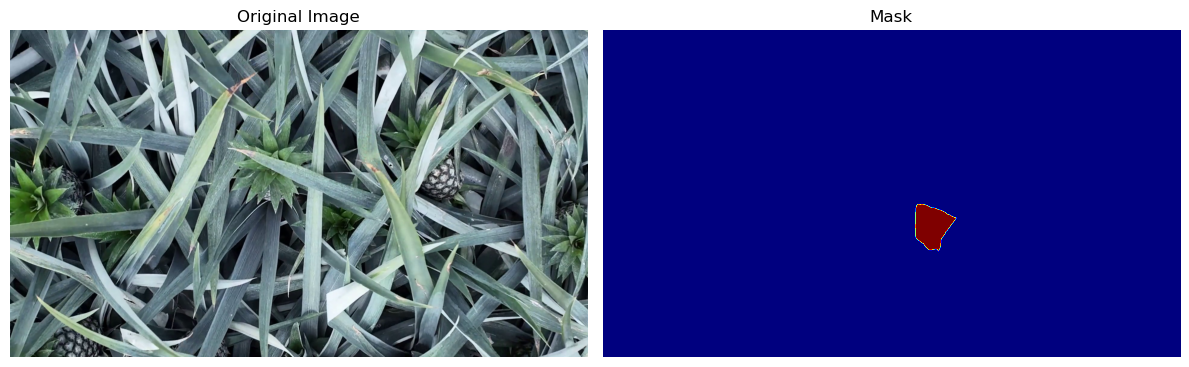

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = "C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00033.png"
image = Image.open(image_path)
image = np.array(image)

# Extract the mask
mask = results[0].masks.data.numpy()

# Normalize the mask (if necessary)
mask_normalized = mask / mask.max()

# Create a figure with two subplots
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot the original image on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Hide axes

# Plot the mask on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(mask_normalized[0], cmap='jet')  # Use the first channel of the mask
plt.title('Mask')
plt.axis('off')  # Hide axes

# Display the figure
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [110]:
import numpy as np

def compute_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    iou = np.sum(intersection) / np.sum(union)
    return iou

# Example usage
mask1 = np.array([[1, 0, 0], [0, 1, 1], [0, 1, 1]])
mask2 = np.array([[1, 0, 0], [0, 1, 0], [0, 1, 1]])

iou = compute_iou(mask, mask)
print(f"IoU: {iou}")

IoU: 1.0


In [20]:
import numpy as np

def compute_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    iou = np.sum(intersection) / np.sum(union)
    return iou

# Example usage
mask1 = np.array([[1, 0, 0], [0, 1, 1], [0, 1, 1]])
mask2 = np.array([[1, 0, 0], [0, 1, 0], [0, 1, 1]])

iou = compute_iou(mask1, mask2)
print(f"IoU: {iou}")

IoU: 0.8


In [22]:
def compute_jaccard(mask1, mask2):
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    jaccard = np.sum(intersection) / np.sum(union)
    return jaccard

# Example usage
jaccard = compute_jaccard(mask1, mask2)
print(f"Jaccard Similarity: {jaccard}")

Jaccard Similarity: 0.8


In [23]:
compute_jaccard(mask_normalized, mask_normalized)

1.0

In [26]:
from ultralytics import SAM

def generate_mask_from_bbox(image_path, bbox, model, device="cpu", retina_masks=True, imgsz=1024, conf=0.4, iou=0.9):
    """
    Generate a mask for a given image and bounding box using a SAM model.

    Parameters:
        image_path (str): Path to the input image.
        bbox (list or tuple): Bounding box coordinates in [x_min, y_min, x_max, y_max] format.
        model_path (str): Path to the SAM model file.
        device (str): Device to use for inference (e.g., "cpu" or "cuda").
        retina_masks (bool): Whether to use retina masks.
        imgsz (int): Image size for the model.
        conf (float): Confidence threshold for predictions.
        iou (float): IoU threshold for predictions.

    Returns:
        dict: Results containing the mask and other relevant information.
    """
    # Run inference
    results = model(
        image_path,
        device=device,
        bboxes=bbox,
        retina_masks=retina_masks,
        imgsz=imgsz,
        conf=conf,
        iou=iou,
        save=False  # Set save to False to avoid saving results to disk
    )

    return results[0].masks.data.numpy()


image_path = "C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00033.png"
bbox = [1015.6, 567.66, 1190.9, 735.08]
model_path = 'sam2_s.pt'
model = SAM(model_path)

results = generate_mask_from_bbox(image_path, bbox, model)
print(results)


image 1/1 C:\Users\dnnxl\Documents\GitHub\drone-sort\dataset\DJI_20240308110115_0005_V\valid\images\frame_00033.png: 1024x1024 1 0, 5740.7ms
Speed: 167.7ms preprocess, 5740.7ms inference, 30.4ms postprocess per image at shape (1, 3, 1024, 1024)
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]
